# Groupe 3 : Projet Machine Learning

## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

In [2]:
dataset = pd.read_csv('scitweets_export.tsv', sep='\t')
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


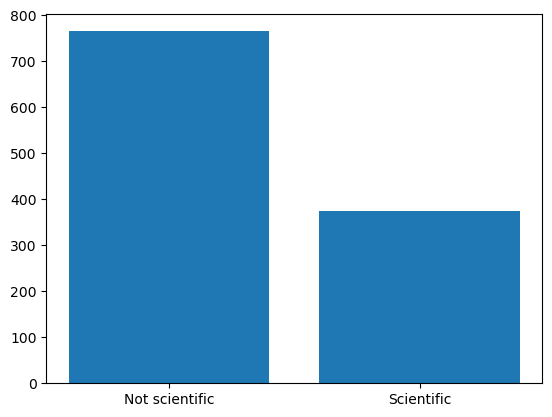

In [3]:
not_scientific = dataset.where(dataset['science_related'] == 0)
scientific = dataset.where(dataset['science_related'] == 1)

fig, ax = plt.subplots()
ax.bar(['Not scientific', 'Scientific'], [not_scientific['tweet_id'].count(), scientific['tweet_id'].count()])
plt.show()

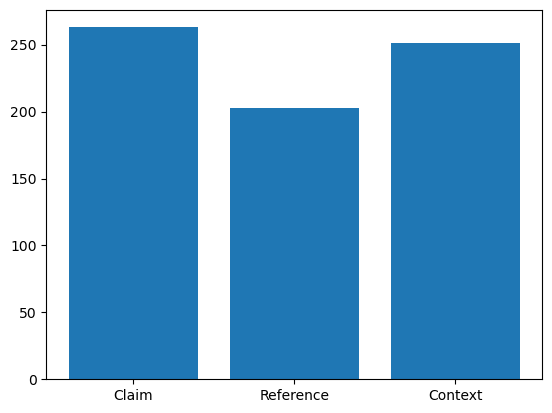

In [4]:
fig, ax = plt.subplots()
ax.bar(['Claim', "Reference", "Context"],
       [scientific.where(scientific['scientific_claim'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_reference'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_context'] == 1)['tweet_id'].count()])
plt.show()

## Prétraitement

On met tout en minuscule

In [5]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower())
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",can any gynecologist with cancer experience ex...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",does daily routine help prevent problems with ...,1,1.0,0.0,0.0


### Lemmatization

download the packages

In [6]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tiziri-tamani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Remove the stopwords but not the negation words or the words that are important for the sentiment analysis

In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
work_to_keep = ['no', 'not', 'nor', 'too', 'very', 'against', 'but', 'don', 'don\'t', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

for word in work_to_keep:
    stop_words.remove(word)

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the links

In [8]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        if 'http' in word or 'www' in word:
            continue
        new_text.append(word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Transform the emojis into text

In [9]:
import emoji

# Parcourir les indices et modifier directement les valeurs dans le DataFrame
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = emoji.demojize(line['text'])

# Afficher les premières lignes du DataFrame pour vérifier les modifications
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym :basketball::fle...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the non-alphabetic characters except the #

In [10]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        new_word = ""
        for l in word:
            if l.isalpha() or l in ['#', "'", '?', '!'] :
                new_word += l
            else:
                new_word += ' '
        new_text.append(new_word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym basketball fle...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch lock highs lead sleeping couch gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove multiple spaces

In [11]:
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = ' '.join(line['text'].split())

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore guess that's sign recent treadm...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym basketball flexe...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch lock highs lead sleeping couch gotta sto...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


## Vectorisation des textes

(TF-IDF)

## Lemmatization 

In [12]:
# #lemmatization  avec nltk 
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Télécharger les ressources nécessaires (à faire une seule fois)
# nltk.download('punkt')
# nltk.download('wordnet')

# # Initialiser le lemmatiseur
# lemmatizer = WordNetLemmatizer()

# def lemmatize_text_nltk(text):
#     # Tokeniser le texte
#     tokens = word_tokenize(text, language='english')
#     # Lemmatiser chaque token
#     lemmas = [lemmatizer.lemmatize(token) for token in tokens]
#     # Rejoindre les lemmes en une seule chaîne de caractères
#     return ' '.join(lemmas)

# # Appliquer la lemmatisation
# dataset['text_lemmatized'] = dataset['text'].apply(lemmatize_text_nltk)

In [13]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Charger le modèle de langue anglaise de spaCy
nlp = spacy.load('en_core_web_sm')

# Fonction pour lemmatiser un texte
def lemmatize_text(text):
    # Traiter le texte avec spaCy
    doc = nlp(text)
    # Récupérer les lemmes de chaque token
    lemmas = [token.lemma_ for token in doc]
    # Rejoindre les lemmes en une seule chaîne de caractères
    return ' '.join(lemmas)


# Appliquer la lemmatisation à la colonne 'text'
dataset['text_lemmatized'] = dataset['text'].apply(lemmatize_text)

# Afficher les résultats de la lemmatisation
print("Avant la lemmatisation :")
print(dataset['text'])
print("\nAprès la lemmatisation :")
print(dataset['text_lemmatized'])


Avant la lemmatisation :
0       knees bit sore guess that's sign recent treadm...
1       mcdonald's breakfast stop gym basketball flexe...
2       gynecologist cancer experience explain dangers...
3       couch lock highs lead sleeping couch gotta sto...
4       daily routine help prevent problems bipolar di...
                              ...                        
1135    laylafanucci realdonaldtrump sorry but not mil...
1136    dear #nin applicants kindly download enrolment...
1137               whats uber support team email address?
1138           house passes bill increase stimulus checks
1139    berriemoomin #런쥔을 공평하게 대하세요 renjun deserve bet...
Name: text, Length: 1140, dtype: object

Après la lemmatisation :
0       knee bit sore guess that be sign recent treadm...
1       mcdonald 's breakfast stop gym basketball flex...
2       gynecologist cancer experience explain danger ...
3       couch lock high lead sleep couch get to stop shit
4       daily routine help prevent prob

## Vectorisation 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Diviser les données en ensembles d'entraînement et de test
X = dataset['text_lemmatized']  # Utiliser uniquement la colonne 'text' comme feature
y_binary = dataset['science_related']  # Étiquette binaire (scientifique ou non)

# Diviser les données AVANT la vectorisation
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Vectorisation : apprendre le vocabulaire et les poids TF-IDF uniquement sur les données d'entraînement
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_train_vec = vectorizer.fit_transform(X_train)  # Apprentissage et transformation sur l'entraînement

# Appliquer la transformation aux données de test (sans réapprendre)
X_test_vec = vectorizer.transform(X_test)

## PCA PROJECTION

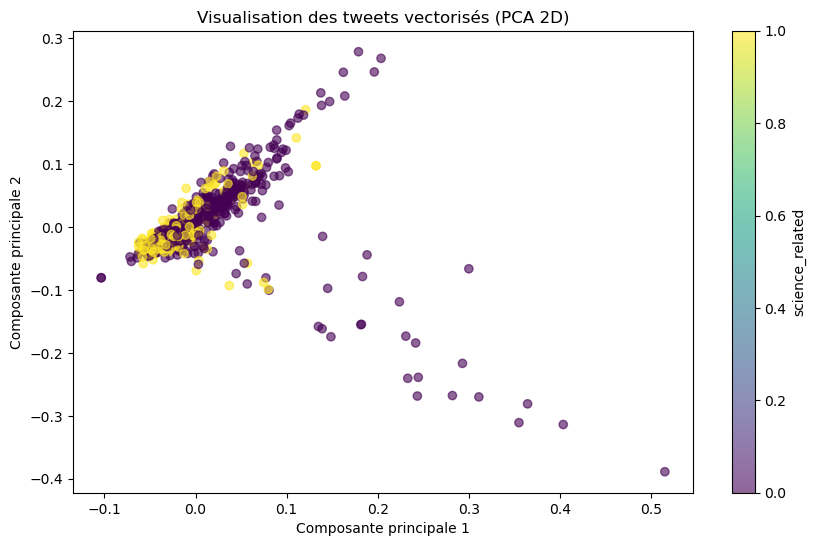

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire la dimension à 2D avec PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vec.toarray())  # Convertir la matrice creuse en tableau dense

# Visualiser les données en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='science_related')
plt.title('Visualisation des tweets vectorisés (PCA 2D)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

## visualisation avec tsne 

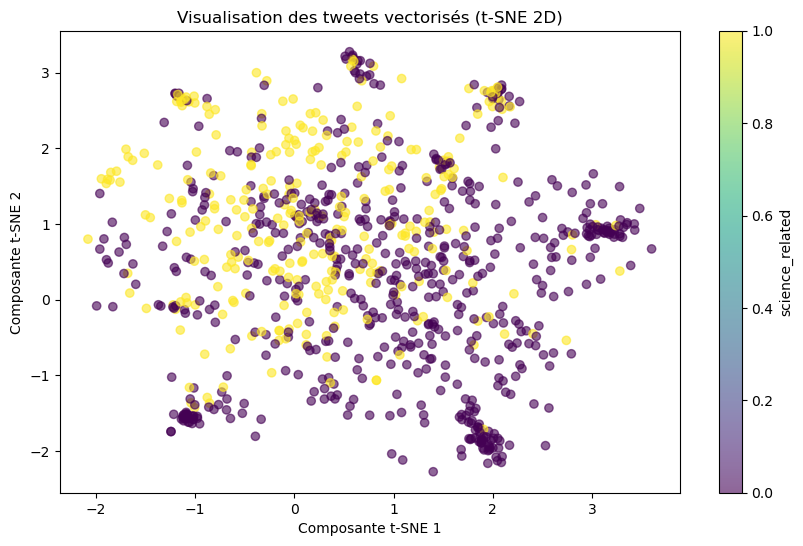

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Réduire la dimension à 2D avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_train_tsne = tsne.fit_transform(X_train_vec.toarray())

# Visualiser les données en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='science_related')
plt.title('Visualisation des tweets vectorisés (t-SNE 2D)')
plt.xlabel('Composante t-SNE 1')
plt.ylabel('Composante t-SNE 2')
plt.show()

## visualisation avec UMAP
#### les donners sont tres corrélé je pense 

/home/tiziri-tamani/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


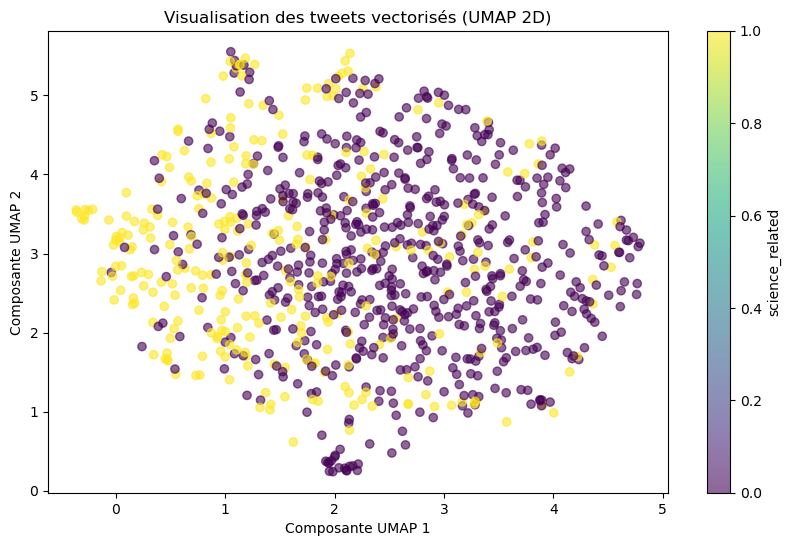

In [19]:
import umap
import umap.umap_ as umap

# Réduire la dimension à 2D avec UMAP
umap_reducer = umap.UMAP(random_state=42)
X_train_umap = umap_reducer.fit_transform(X_train_vec.toarray())

# Visualiser les données en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='science_related')
plt.title('Visualisation des tweets vectorisés (UMAP 2D)')
plt.xlabel('Composante UMAP 1')
plt.ylabel('Composante UMAP 2')
plt.show()

## TF_IDF projection 

In [17]:
import numpy as np

# Obtenir les mots (features) et leurs poids TF-IDF
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_train_vec.mean(axis=0)).flatten()

# Associer les mots à leurs scores TF-IDF
word_tfidf = list(zip(feature_names, tfidf_scores))

# Trier par score TF-IDF
word_tfidf_sorted = sorted(word_tfidf, key=lambda x: x[1], reverse=True)

# Afficher les 20 mots les plus importants
print("Top 20 mots les plus importants :")
for word, score in word_tfidf_sorted[:100]:
    print(f"{word}: {score:.4f}")

Top 20 mots les plus importants :
stop: 0.0158
support: 0.0130
not: 0.0105
report: 0.0084
people: 0.0071
cause: 0.0069
new: 0.0062
get: 0.0062
science: 0.0061
increase: 0.0060
face: 0.0054
lead: 0.0053
need: 0.0047
study: 0.0046
one: 0.0046
good: 0.0045
but: 0.0043
via: 0.0042
be: 0.0042
go: 0.0041
do: 0.0041
like: 0.0040
help: 0.0040
change: 0.0039
life: 0.0039
we: 0.0038
man: 0.0037
heart: 0.0036
woman: 0.0036
treat: 0.0036
rt: 0.0036
with: 0.0035
use: 0.0035
make: 0.0034
today: 0.0034
day: 0.0034
find: 0.0034
cancer: 0.0034
say: 0.0034
no: 0.0033
trump: 0.0033
do not: 0.0033
way: 0.0033
health: 0.0032
prevent: 0.0032
job: 0.0032
promote: 0.0032
see: 0.0031
research: 0.0031
great: 0.0031
could: 0.0031
year: 0.0031
look: 0.0030
time: 0.0030
take: 0.0030
brain: 0.0030
would: 0.0029
face with: 0.0029
well: 0.0029
please: 0.0029
eye: 0.0029
world: 0.0028
show: 0.0028
right: 0.0028
state: 0.0028
work: 0.0028
can: 0.0027
news: 0.0027
video: 0.0027
game: 0.0027
break: 0.0026
high: 0.0026
af

In [22]:
from sklearn.feature_selection import chi2

# Calculer les scores du chi-deux et les p-values
chi2_scores, p_values = chi2(X_train_vec, y_train)

# Afficher les résultats
import numpy as np

# Associer les mots à leurs scores et p-values
feature_names = vectorizer.get_feature_names_out()
chi2_results = list(zip(feature_names, chi2_scores, p_values))

# Trier par score du chi-deux (du plus élevé au plus faible)
chi2_results_sorted = sorted(chi2_results, key=lambda x: x[1], reverse=True)

# Afficher les 10 mots les plus significatifs
print("Top 10 mots les plus significatifs (chi-deux) :")
for word, score, p_value in chi2_results_sorted[:50]:
    print(f"{word}: chi2 = {score:.2f}, p-value = {p_value:.4f}")

Top 10 mots les plus significatifs (chi-deux) :
study: chi2 = 6.78, p-value = 0.0092
stop: chi2 = 5.40, p-value = 0.0201
health: chi2 = 4.86, p-value = 0.0275
brain: chi2 = 3.70, p-value = 0.0544
eurekamag: chi2 = 3.44, p-value = 0.0636
risk: chi2 = 3.41, p-value = 0.0649
research: chi2 = 3.02, p-value = 0.0823
cancer: chi2 = 3.02, p-value = 0.0823
reduce: chi2 = 3.01, p-value = 0.0829
support: chi2 = 2.94, p-value = 0.0866
scientist: chi2 = 2.86, p-value = 0.0907
infection: chi2 = 2.65, p-value = 0.1036
treatment: chi2 = 2.53, p-value = 0.1118
climate: chi2 = 2.53, p-value = 0.1118
change people: chi2 = 2.25, p-value = 0.1334
pain change: chi2 = 2.25, p-value = 0.1334
climate change: chi2 = 2.21, p-value = 0.1371
suicide: chi2 = 2.13, p-value = 0.1445
new study: chi2 = 2.11, p-value = 0.1464
poverty: chi2 = 2.11, p-value = 0.1465
study find: chi2 = 2.05, p-value = 0.1517
virus: chi2 = 2.00, p-value = 0.1574
sleep: chi2 = 1.99, p-value = 0.1585
coronavirus: chi2 = 1.94, p-value = 0.164

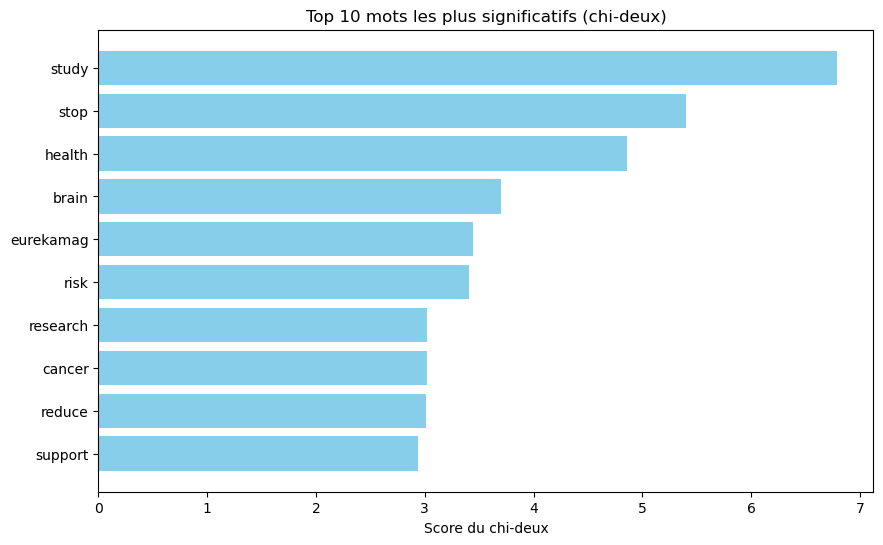

In [23]:
import matplotlib.pyplot as plt

# Extraire les 10 premiers mots et leurs scores
top_words = [word for word, _, _ in chi2_results_sorted[:10]]
top_scores = [score for _, score, _ in chi2_results_sorted[:10]]

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_scores, color='skyblue')
plt.xlabel('Score du chi-deux')
plt.title('Top 10 mots les plus significatifs (chi-deux)')
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher le mot le plus significatif en haut
plt.show()